# Домашнее задание по кластеризации

Набор данных содержит сведения о 9000 клиентов банка.

Колонки в датасете:
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/home_work_7-8_clustering/Credit%20Card%20Dataset.csv"
df = pd.read_csv(url)

In [ ]:
df = df.drop(columns = ['CUST_ID'])
df = df[df['MINIMUM_PAYMENTS'].isnull() == False]
df = df[df['CREDIT_LIMIT'].isnull() == False]
x = 'PAYMENTS'
y = 'BALANCE_FREQUENCY'

## Задания

### Задание 1.

Провести исследование данных (в том числе с визуализацией, к исследованию должны быть даны выводы и комментарии, все графики и оси должны быть подписаны).

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Figure size 720x432 with 0 Axes>

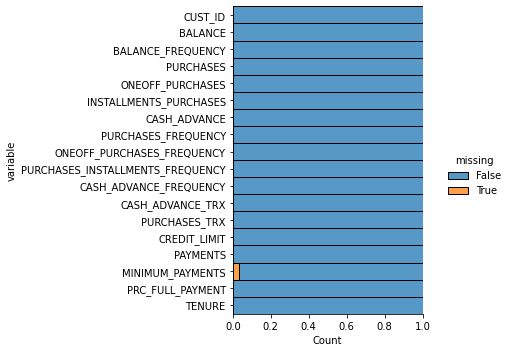

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

df.isna().sum()

Незначительное количество пропусков данных присутствует в колонке "MINIMUM_PAYMENTS".

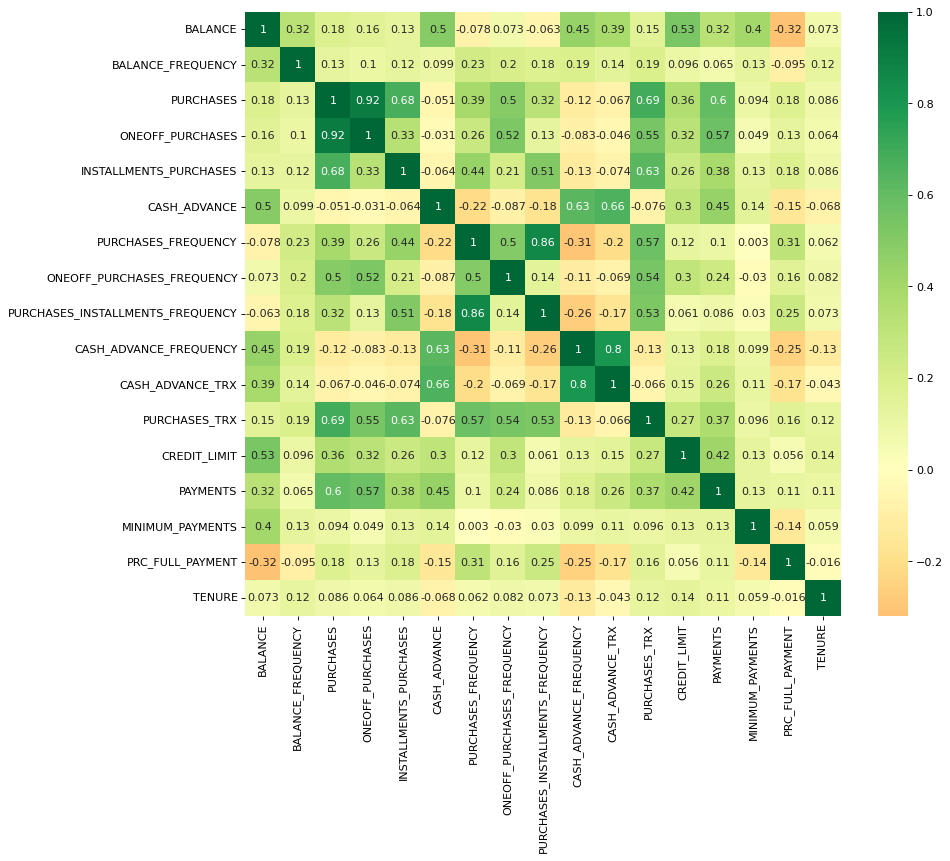

In [41]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

Некоторые критерии коррелируют, но преобладают несвязанные характеристики.

### Задание 2

Реализовать метод кластеризации KMeans:
1. Методом локтя и силуэта (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

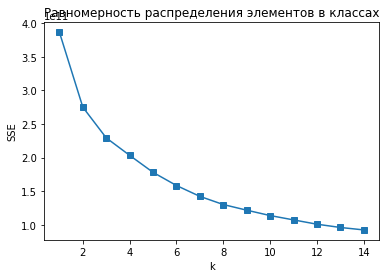

In [21]:
from sklearn.cluster import KMeans

SSE = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,15), SSE, marker='s')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Равномерность распределения элементов в классах')
plt.show()

Видим, что "локоть" сгибается при разбиении на 8 классов.

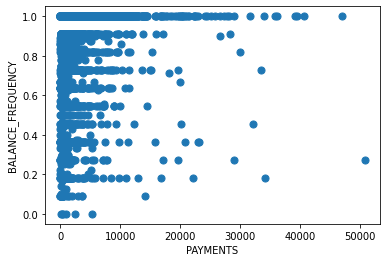

In [29]:
plt.scatter(df[x], df[y], s=50)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

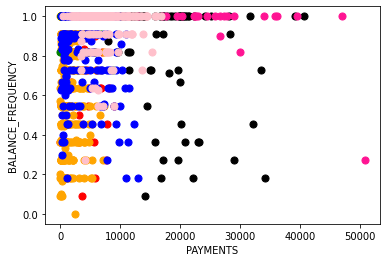

In [27]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
Y_pred = kmeans.labels_
df['cluster'] = Y_pred

plt.scatter(df[df['cluster']==1][x], df[df['cluster']==1][y], s=50, color='red')
plt.scatter(df[df['cluster']==2][x], df[df['cluster']==2][y], s=50, color='orange')
plt.scatter(df[df['cluster']==3][x], df[df['cluster']==3][y], s=50, color='black')
plt.scatter(df[df['cluster']==4][x], df[df['cluster']==4][y], s=50, color='green')
plt.scatter(df[df['cluster']==5][x], df[df['cluster']==5][y], s=50, color='blue')
plt.scatter(df[df['cluster']==6][x], df[df['cluster']==6][y], s=50, color='deeppink')
plt.scatter(df[df['cluster']==7][x], df[df['cluster']==7][y], s=50, color='pink')
plt.scatter(df[df['cluster']==8][x], df[df['cluster']==8][y], s=50,color='violet')

plt.xlabel(x)
plt.ylabel(y)
plt.title('Разбиение на классы')
plt.show()

### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

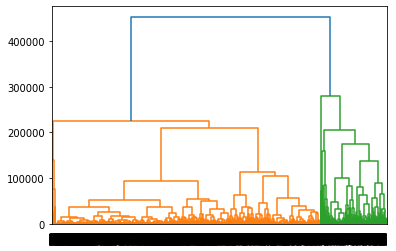

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
Z = linkage(df, 'ward')
dn = dendrogram(Z)

Видим, что оптимальным будет разбиение на 8 кластеров.

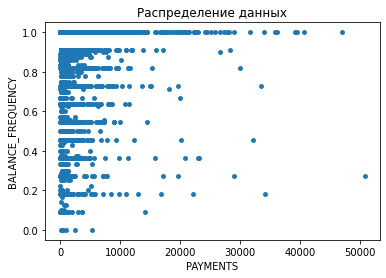

In [32]:
plt.scatter(df[x], df[y], s=15)
plt.xlabel(x)
plt.ylabel(y)
plt.title('Распределение данных')
plt.show()

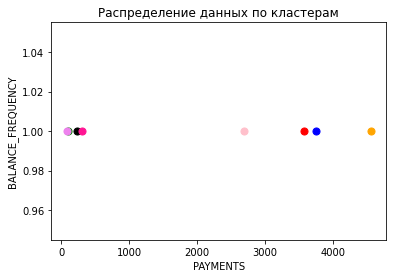

In [33]:
label = fcluster(Z, 8, criterion='distance')
df['pred_scipy'] = label

plt.scatter(df[df['pred_scipy']==1][x], df[df['pred_scipy']==1][y], s=50, color='red')
plt.scatter(df[df['pred_scipy']==2][x], df[df['pred_scipy']==2][y], s=50, color='orange')
plt.scatter(df[df['pred_scipy']==3][x], df[df['pred_scipy']==3][y], s=50, color='black')
plt.scatter(df[df['pred_scipy']==4][x], df[df['pred_scipy']==4][y], s=50, color='green')
plt.scatter(df[df['pred_scipy']==5][x], df[df['pred_scipy']==5][y], s=50, color='blue')
plt.scatter(df[df['pred_scipy']==6][x], df[df['pred_scipy']==6][y], s=50, color='deeppink')
plt.scatter(df[df['pred_scipy']==7][x], df[df['pred_scipy']==7][y], s=50, color='pink')
plt.scatter(df[df['pred_scipy']==8][x], df[df['pred_scipy']==8][y], s=50,color='violet')

plt.xlabel(x)
plt.ylabel(y)
plt.title('Распределение данных по кластерам')
plt.show()